## Task Dos
### KNN clasificación

In [1]:
import numpy as np
import math
import pandas as pd
import seaborn as sns
#leer el csv de dataset en un dataframe
dfknn= pd.read_csv("./Oranges vs Grapefruit.csv")
dfknn.head()


,name,diameter,weight,red,green,blue
0,orange,2.96,86.76,172,85,2
1,orange,3.91,88.05,166,78,3
2,orange,4.42,95.17,156,81,2
3,orange,4.47,95.60,163,81,4
4,orange,4.48,95.76,161,72,9


In [2]:
dfknn.loc[dfknn['name'] == 'orange', 'num'] = 0 
dfknn.loc[dfknn['name'] == 'grapefruit', 'num'] = 1 

In [3]:
dfknn.head()

,name,diameter,weight,red,green,blue,num
0,orange,2.96,86.76,172,85,2,0.0
1,orange,3.91,88.05,166,78,3,0.0
2,orange,4.42,95.17,156,81,2,0.0
3,orange,4.47,95.60,163,81,4,0.0
4,orange,4.48,95.76,161,72,9,0.0


In [4]:
pd.crosstab(index=dfknn['name'], columns='count')


col_0,count
name,
grapefruit,5000
orange,5000


De lo que podemos observar de aquí es que el 50% de los datos son naranjas y el otro 50 son las toronjas. Se facotriza la variable para poder hacer el modelo de K nearest neighbor de mejor manera y que haga con los numeros la predicción. 

In [5]:
X = dfknn.iloc[:, 1:-1].values
y = dfknn.iloc[:, 6].values


In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)



In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [8]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [10]:
y_pred = classifier.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[945  86]
 [ 86 883]]
              precision    recall  f1-score   support

         0.0       0.92      0.92      0.92      1031
         1.0       0.91      0.91      0.91       969

    accuracy                           0.91      2000
   macro avg       0.91      0.91      0.91      2000
weighted avg       0.91      0.91      0.91      2000



In [11]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

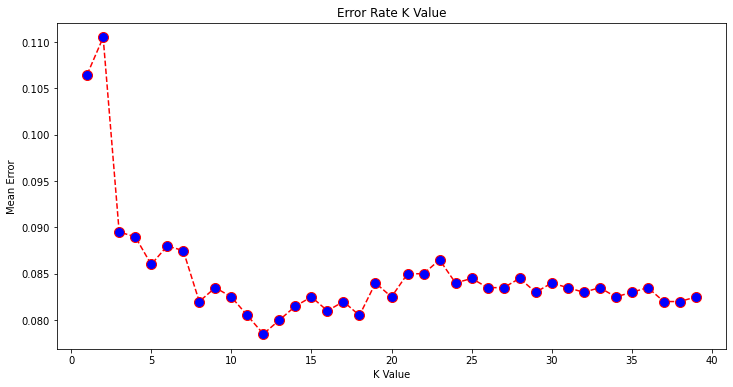

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [14]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=12)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[959  72]
 [ 85 884]]
              precision    recall  f1-score   support

         0.0       0.92      0.93      0.92      1031
         1.0       0.92      0.91      0.92       969

    accuracy                           0.92      2000
   macro avg       0.92      0.92      0.92      2000
weighted avg       0.92      0.92      0.92      2000



In [15]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=13)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[954  77]
 [ 83 886]]
              precision    recall  f1-score   support

         0.0       0.92      0.93      0.92      1031
         1.0       0.92      0.91      0.92       969

    accuracy                           0.92      2000
   macro avg       0.92      0.92      0.92      2000
weighted avg       0.92      0.92      0.92      2000

